[On Jupyter notebook support in PyCharm](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html)

# NetworkX tutorial and experiments

## Basic usage of NetworkX: node creation and inspection

In [121]:
import networkx as nx

H = nx.path_graph(5) # nodes (0,1,2,3,4), edges ((0,1),(1,2),(2,3),(3,4))
print(H.edges)
print(H.nodes)
print(H.adj)
print(H.degree)
print(H.number_of_nodes())
print(H.number_of_edges())
print(list(H.neighbors(1)), H.degree[1]) 
print(H.edges([2,'xxx',0]))
print(H[0], H[0][1], H.edges[0,1]) 
print(0 in H and H.has_node(0) and 77 not in H and H.has_edge(1,0)) 
print(H.nodes(data=True)) 

[(0, 1), (1, 2), (2, 3), (3, 4)]
[0, 1, 2, 3, 4]
{0: {1: {}}, 1: {0: {}, 2: {}}, 2: {1: {}, 3: {}}, 3: {2: {}, 4: {}}, 4: {3: {}}}
[(0, 1), (1, 2), (2, 2), (3, 2), (4, 1)]
5
4
[0, 2] 2
[(2, 1), (2, 3), (0, 1)]
{1: {}} {} {}
True
[(0, {}), (1, {}), (2, {}), (3, {}), (4, {})]


## Graph manipulation

In [122]:
G = nx.Graph()

G.add_node(1)
G.add_nodes_from([(2,7.8),(3,5.6)])

G.add_nodes_from(H)
G.add_node(H) # add graph H as a node in graph G

G.add_edge(0,1)
G.add_edge(*(1,2))

G.remove_node(0)
G.remove_nodes_from([0])

G.clear()

## Attributes

In [123]:
G = nx.Graph(attr1="value1")
G.graph # {'day':'Friday'}
G.graph['day'] = 'Monday'

G.add_node(2, time='5pm')
G.add_nodes_from([4], time='2pm')
print(G.nodes.data()) # [(2, {'time': '5pm'}), (4, {'time': '2pm'})]

G.add_edge(1, 3, weight=4.7)
G.add_edges_from([(0,1)], foo='bar')
G[1][3]['color'] = "blue"
G.edges[1, 3]['color'] = "red"
print(G.edges.data()) # 

[(2, {'time': '5pm'}), (4, {'time': '2pm'})]
[(0, 1, {'foo': 'bar'}), (1, 3, {'color': 'red', 'weight': 4.7})]


## DiGraphs (directed graphs)

In [124]:
D = nx.DiGraph()
D.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
D.out_degree(1, weight='weight')
D.degree(1, weight='weight')
print(list(D.successors(1))) # [2]
print(list(D.predecessors(1))) # [3]
print(list(D.neighbors(1))) # [2]

U = nx.Graph(D)  # convert D to undirected graph
print(D.number_of_edges(), U.number_of_edges())

[2]
[3]
[2]
2 2


## Visualisation

['#00aa00', '#aa0000', '#00aa00', '#aa0000', '#00aa00', '#aa0000', '#00aa00', '#aa0000', '#00aa00', '#aa0000', '#00aa00', '#aa0000', '#00aa00', '#aa0000', '#00aa00', '#aa0000', '#00aa00', '#aa0000', '#00aa00', '#aa0000', '#00aa00', '#aa0000', '#00aa00', '#aa0000', '#00aa00', '#aa0000', '#00aa00', '#aa0000', '#00aa00', '#aa0000', '#00aa00', '#aa0000', '#00aa00', '#aa0000']


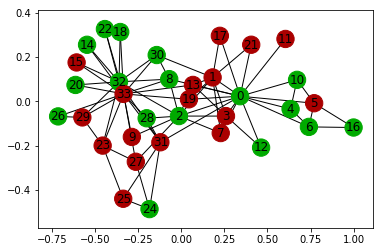

In [125]:
import matplotlib.pyplot as plt

# Set random seed used by NetworkX
import random; from numpy import random as nprand
seed = hash("Network Science in Python!") % 2**32
nprand.seed(seed); random.seed(seed)

# G = nx.petersen_graph()
# plt.subplot(331) # <matplotlib.axes._subplots.AxesSubplot object at ...>
# nx.draw(G, with_labels=True, font_weight='bold')
# plt.subplot(332) # <matplotlib.axes._subplots.AxesSubplot object at ...>
# nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
# options = { 'node_color': 'black', 'node_size': 100,'width': 3, }
# plt.subplot(333); nx.draw_random(G, **options)
# plt.subplot(334); nx.draw_circular(G, **options)
# plt.subplot(335); nx.draw_spectral(G, **options)
# plt.subplot(336); nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)
# plt.show()
# 
# plt.figure(figsize=(7.5, 7.5))
# nx.draw_networkx(G)
# plt.show()
# 
# plt.figure(figsize=(10, 7.5))
# nx.draw_networkx(G)
# plt.show()

G = nx.karate_club_graph()
karate_pos = nx.spring_layout(G, k=0.3)
node_color = ['#00aa00' if v%2==0 else '#aa0000' for v in G.nodes]
print(node_color)
nx.draw_networkx(G, karate_pos, node_color=node_color)
plt.show()

## MultiGraphs

In [126]:
MG = nx.MultiGraph()
MG.add_edges_from([(1,2,{'K':'A'}), (1,2,{'K':'B'}), (5,3), (3,5), (5,3)])
print(MG.edges([1,5])) # [(1, 2), (1, 2), (5, 3), (5, 3), (5, 3)]
print(MG.edges[1,2,0]) # {'K','A'}
print(MG.edges.get([1,2,2])) # None

[(1, 2), (1, 2), (5, 3), (5, 3), (5, 3)]
{'K': 'A'}
None


## Layouts

## Out-of-the-box graphs